In [391]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
from matplotlib import cm
import matplotlib

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

plt.style.use("seaborn-darkgrid")

In [6]:
# setup path to sumout files
sumout_path = "../pydata/sumout_files/"
sumout_files = glob.glob(sumout_path+"*.sumout")
print(sumout_files)

['../pydata/sumout_files/BD+12_1917.sumout', '../pydata/sumout_files/BD+12_1926.sumout']


In [323]:
# read the sumout file into a pandas dataframe
# this is tricky as the sumout files are subdivided into individual tables for each species
file_dict = {}
for file in sumout_files:
    f_name = file.split("/")[-1].split(".")[0]
    with open(file) as sumout_file:
        species_dict = {}
        lines = sumout_file.readlines()
        stellar_info = lines[0:3]
        lines = lines[4:]
        #mask out some lines that aren't needed
        mask_list = ["E.P.", "R.W.", "wavelength trends", "wav. correl.", "average abundance"]
        line_mask = [not any(x in line for x in mask_list) for line in lines]
        masked_lines = np.array(lines)[line_mask]
    
        #find the gaps between species tables
        species_gaps = np.where(masked_lines=='\n')[0]
        for idx,gap in enumerate(species_gaps):
            if idx == 0:
                last_gap = 0
            else:
                last_gap = species_gaps[idx-1]
            species_lines = masked_lines[last_gap:gap]
        
            if species_lines[0] == "\n":
                species_lines = species_lines[1:]
            
            species = species_lines[0][30:35]
            input_abund = species_lines[0][-7:-2]
        
            # read this to a tmp file
            with open("tmp.txt", "w") as out:
                for line in species_lines:
                    if line[0:2] == "  ":
                        out.write(line[2:])
                    else:
                        out.write(line)
            # read the tmp file out to a pandas dataframe
            df = pd.read_csv("tmp.txt", delim_whitespace=True,skiprows=1)
            species_dict[species] = (input_abund, df)
    file_dict[f_name] = species_dict
        

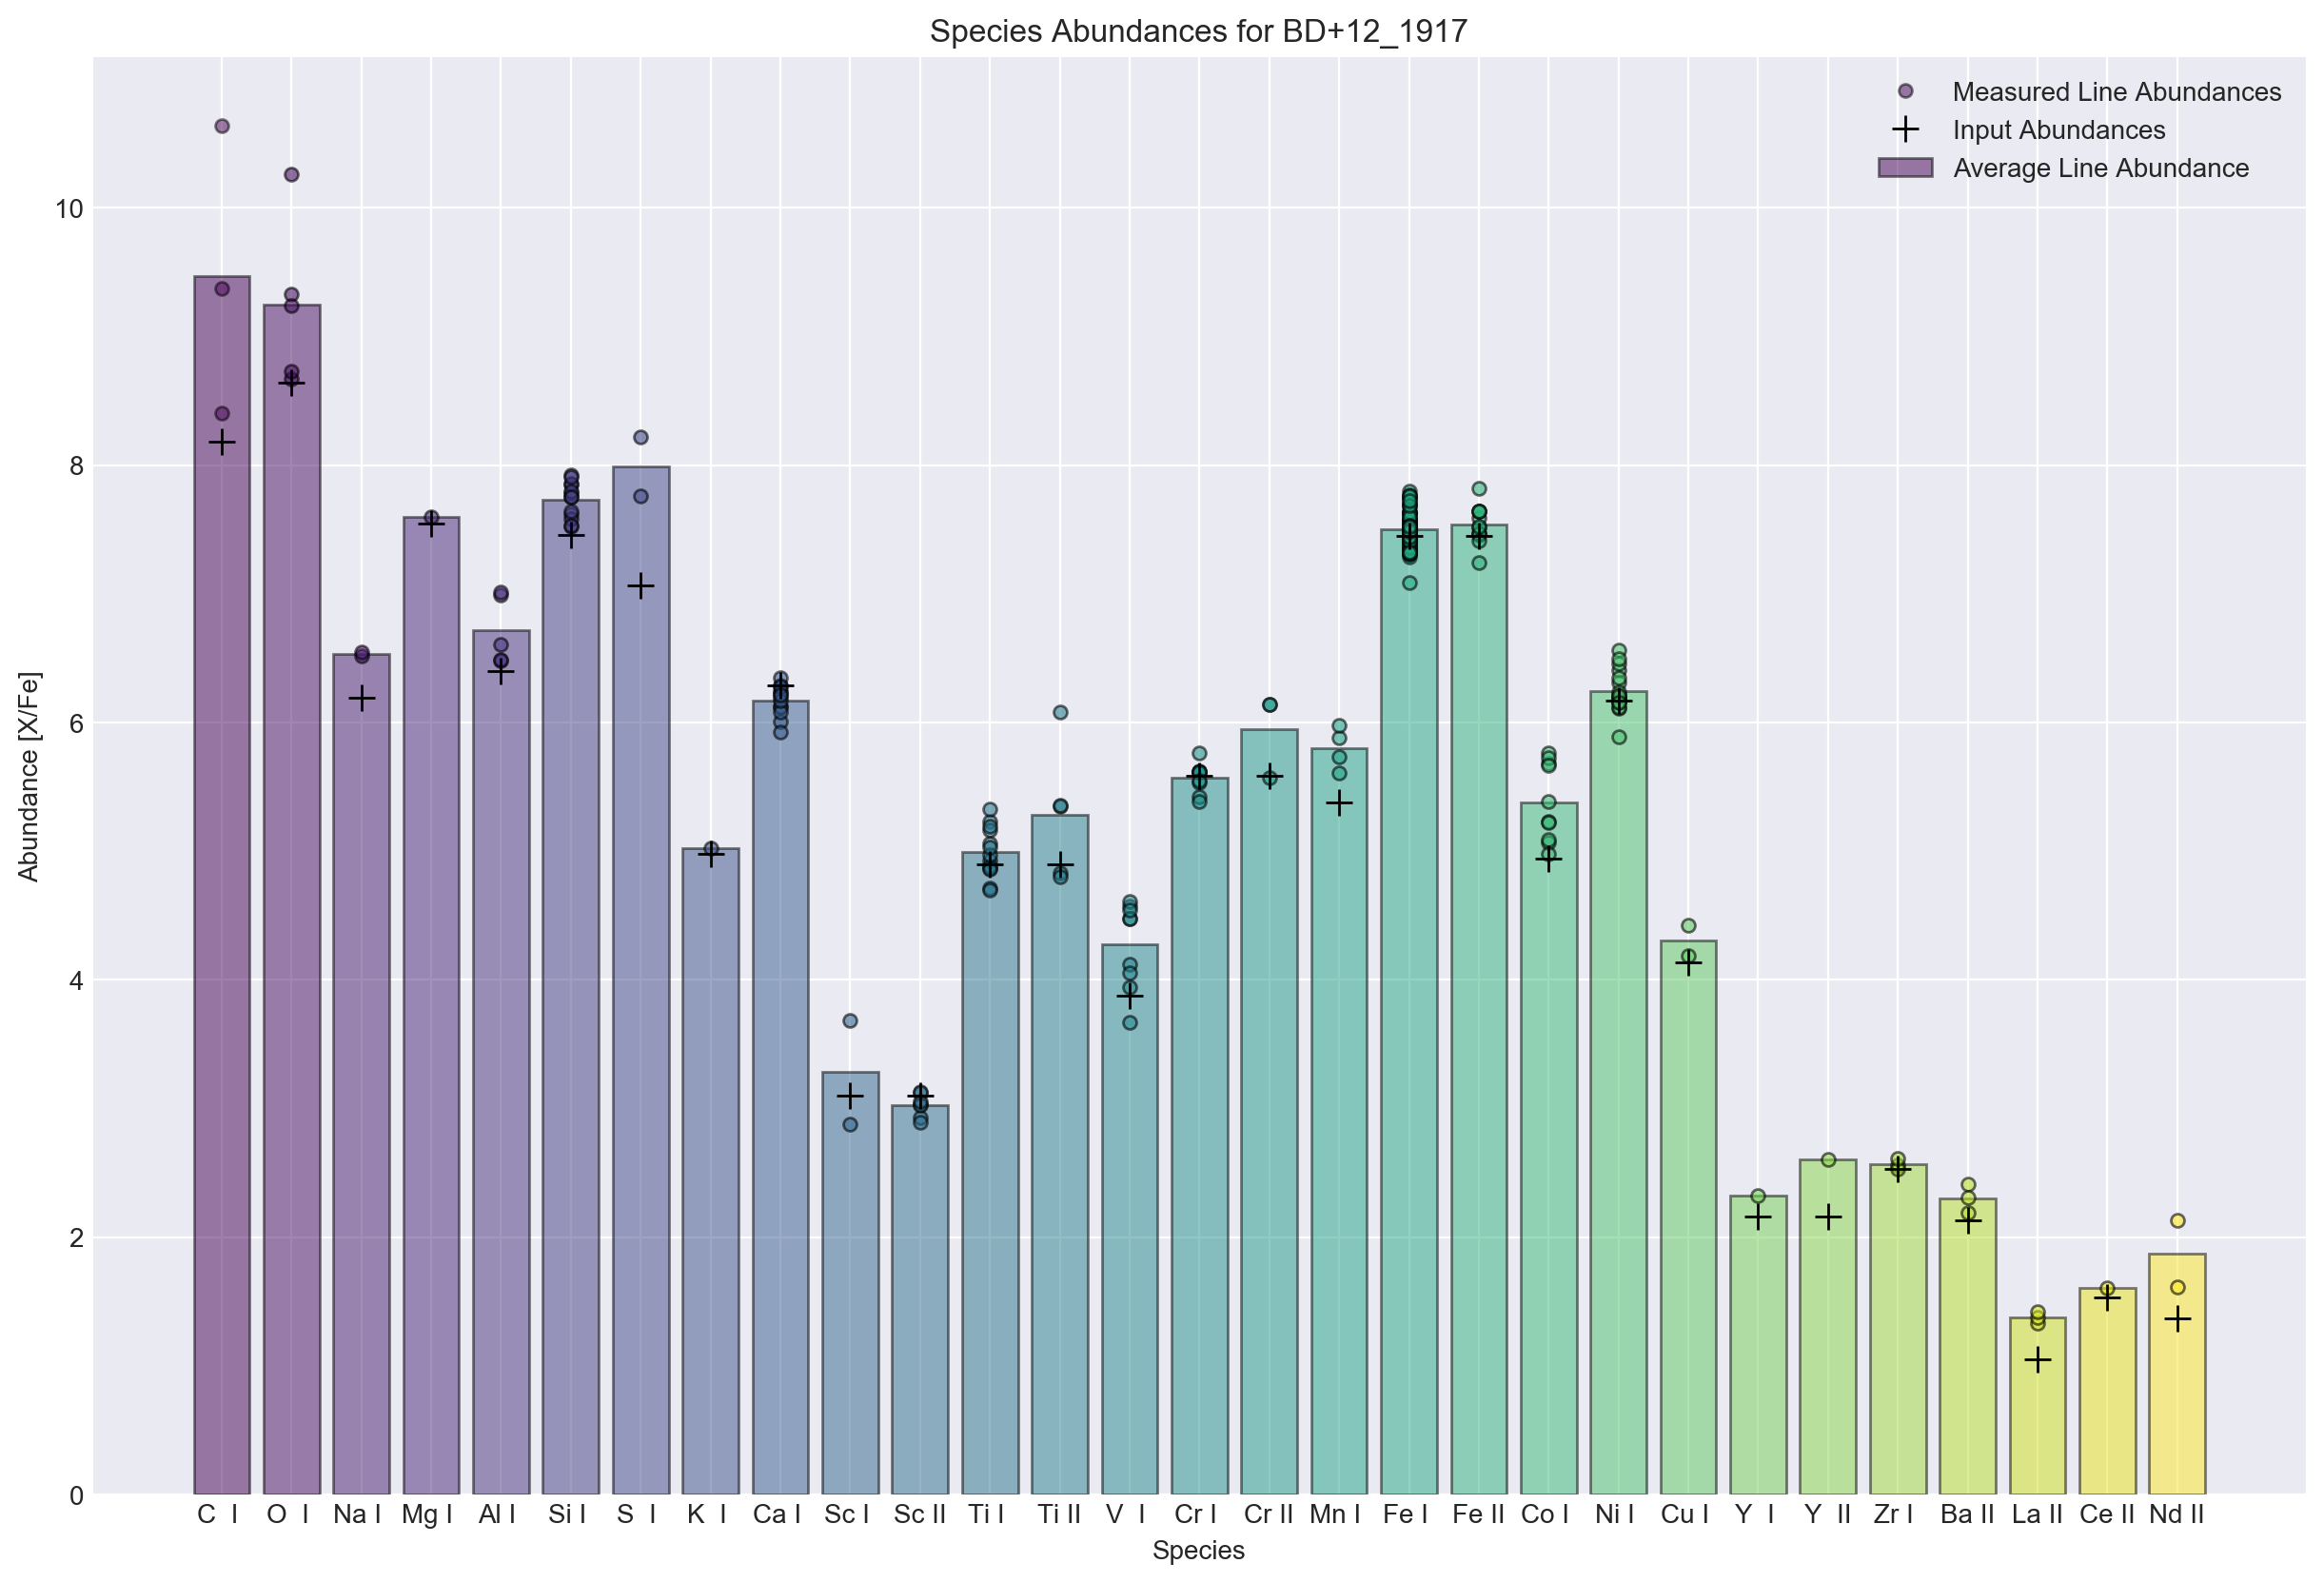

In [320]:
plt.figure(figsize=(15,10),dpi=200)
plt.title("Species Abundances for BD+12_1917")
plt.ylabel("Abundance [X/Fe]")
plt.xlabel("Species")
markersize=10
color_idx = np.linspace(0, 1, len(species_dict.keys()))
for idx, key in enumerate(species_dict.keys()):
    if idx == 0:
        input_abund, species_df = species_dict[key]
        plt.plot([key]*len(species_df['abund']), species_df['abund'], '.', alpha=0.5, color=plt.cm.viridis(color_idx[idx]), label = "Measured Line Abundances", markersize=markersize, markeredgewidth=1, markeredgecolor='k')
        plt.plot([key], [float(input_abund)],  '+',color='k', label = "Input Abundances", markersize=markersize)
        #plt.plot([key], [np.mean(species_df['abund'])],  '*',color='k', label = "Average Line Abundance", markersize=markersize)
        plt.bar([key], [np.mean(species_df['abund'])], alpha=0.5,color=plt.cm.viridis(color_idx[idx]),label = "Average Line Abundance", ec='k')
        
    else:
        input_abund, species_df = species_dict[key]
        plt.plot([key]*len(species_df['abund']), species_df['abund'], '.', color=plt.cm.viridis(color_idx[idx]),alpha=0.58, markersize=markersize, markeredgewidth=1, markeredgecolor='k')
        plt.plot([key], [float(input_abund)],  '+',color='k', markersize=markersize)
        #plt.plot([key], [np.mean(species_df['abund'])],  '*',color='k', markersize=markersize)
        plt.bar([key], [np.mean(species_df['abund'])],color=plt.cm.viridis(color_idx[idx]), alpha=0.5, ec='k')
plt.legend()
#plt.savefig("../plots/bd_12_1917_abund.png")
#plt.savefig("../plots/bd_12_1926_abund.png")

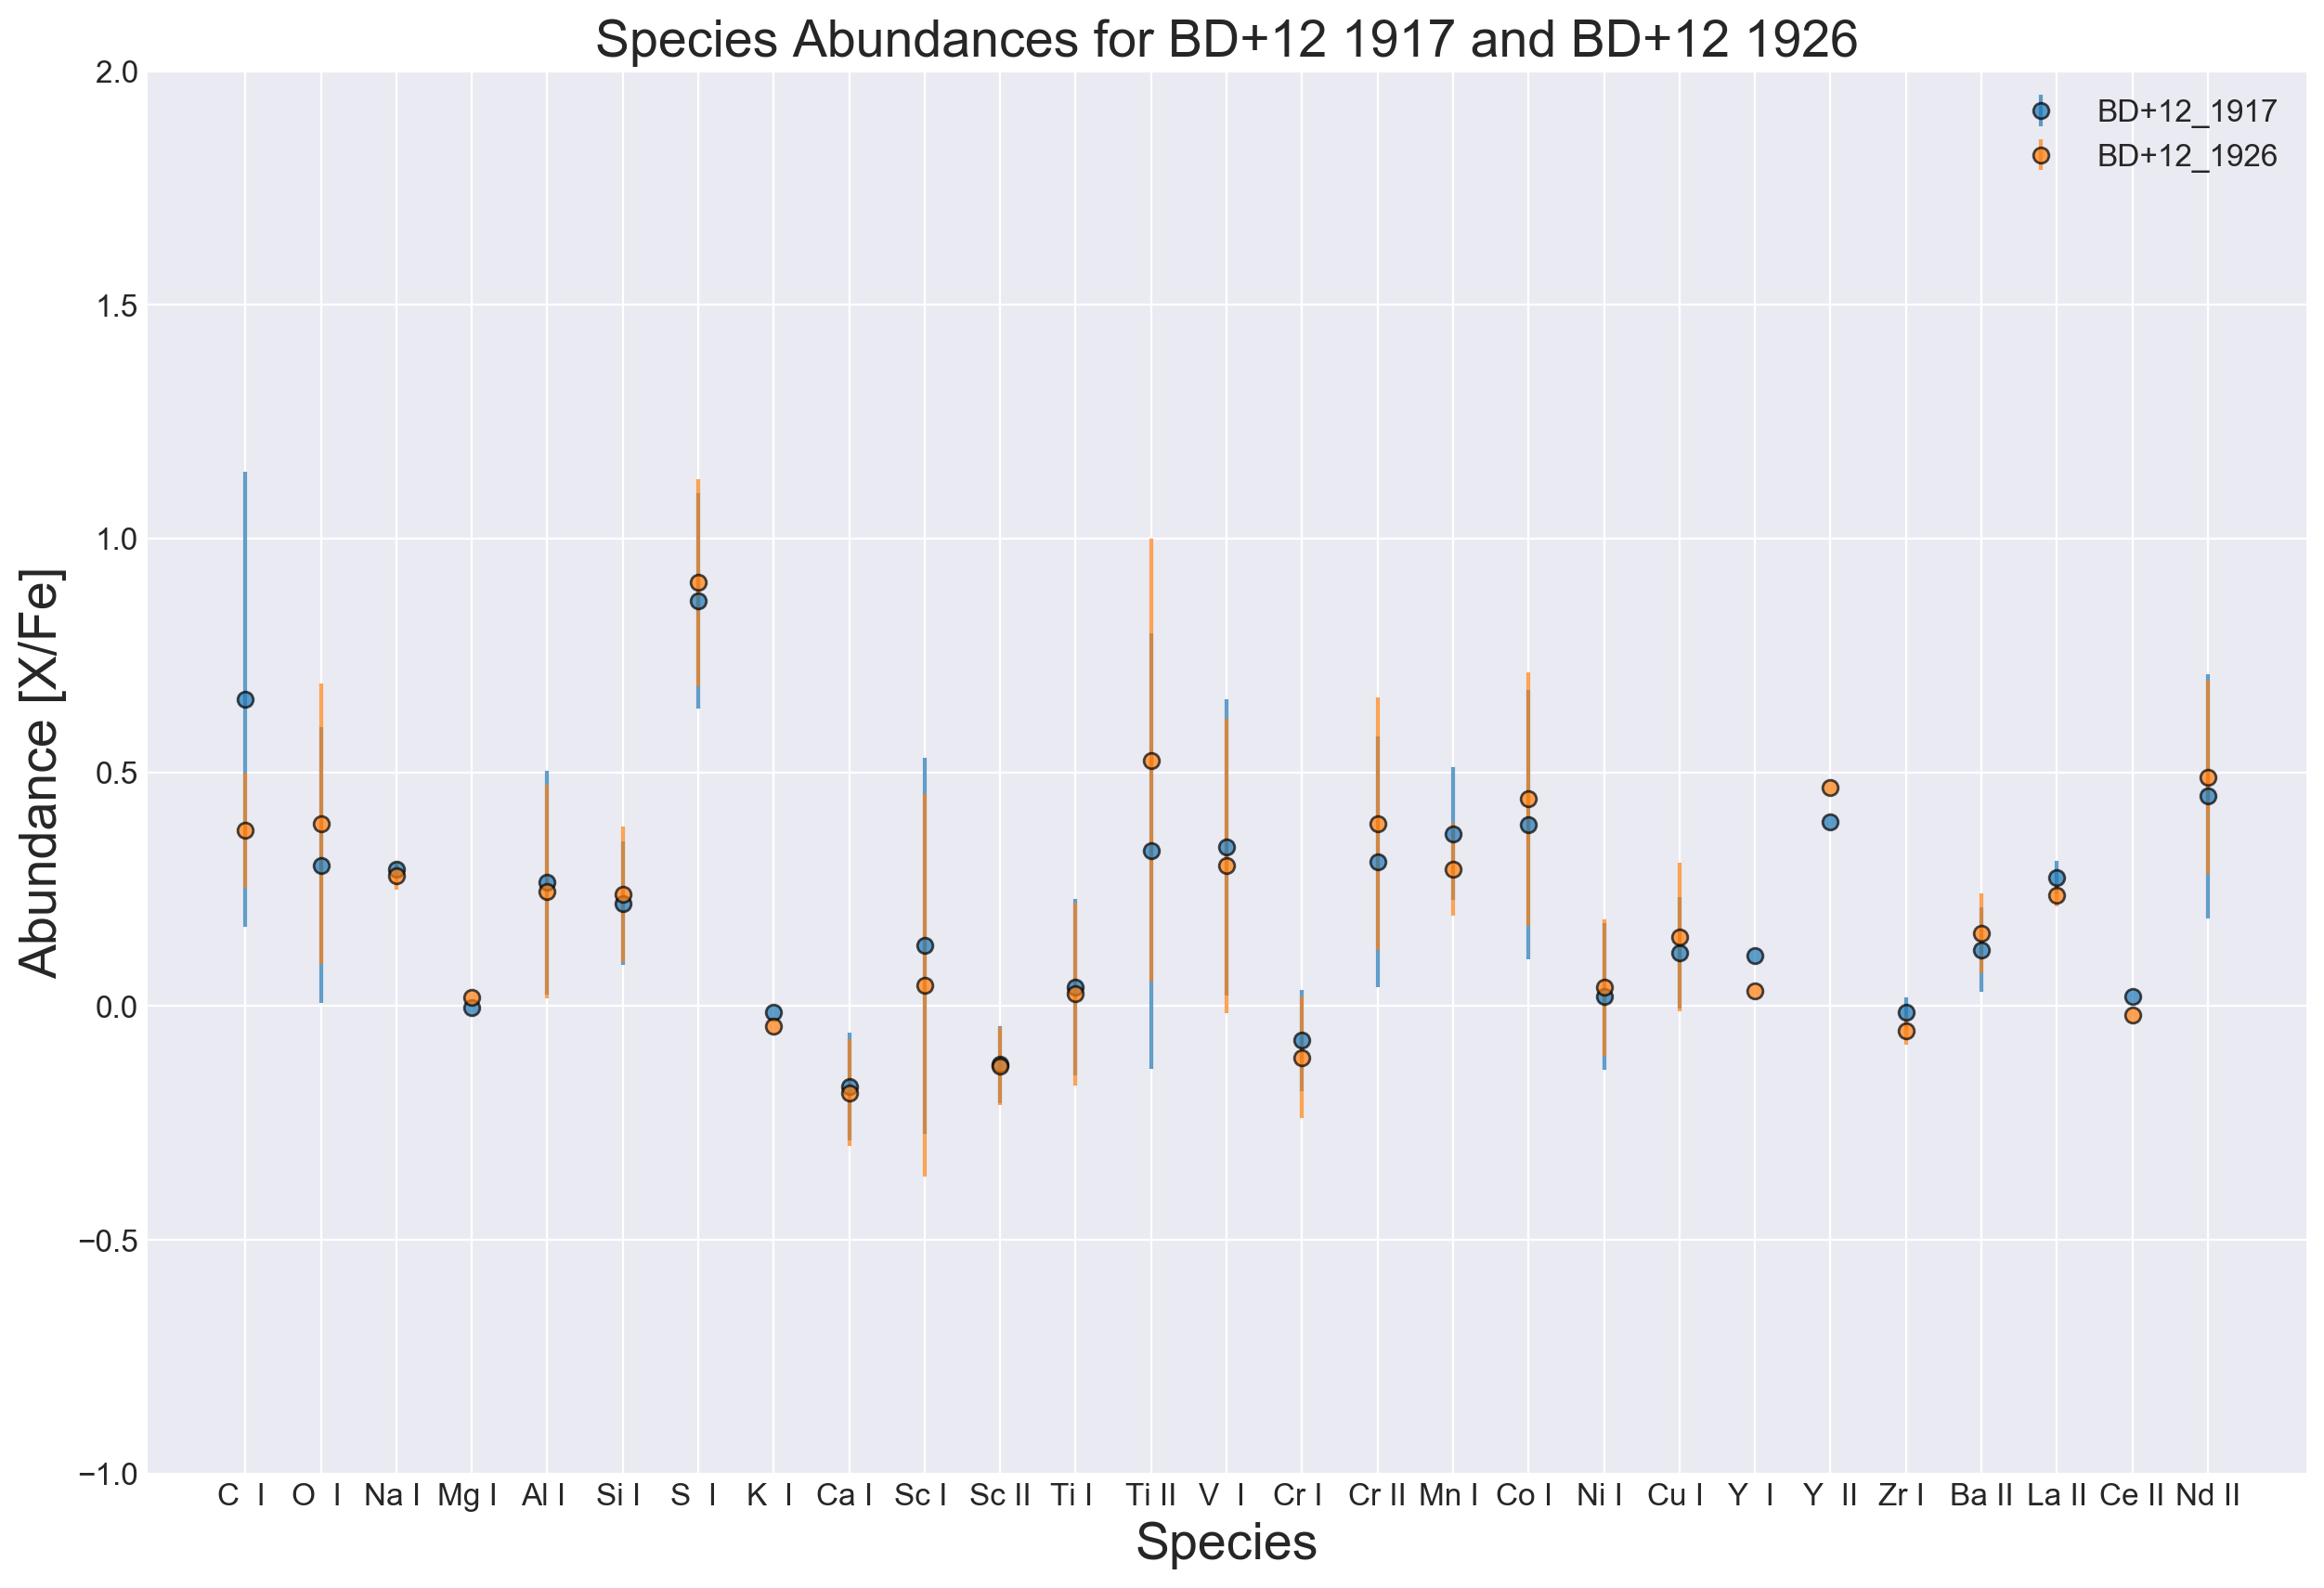

In [393]:
plt.figure(figsize=(15,10),dpi=200)
plt.title("Species Abundances for BD+12 1917 and BD+12 1926", fontsize=20)
plt.ylabel("Abundance [X/Fe]", fontsize=20)
plt.xlabel("Species",fontsize=20)
plt.ylim(-1.0,2.0)

for f_key in file_dict.keys():
    species_dict = file_dict[f_key]
    input_fe_abund, fe_df = species_dict['Fe I ']
    fe_h = np.mean(fe_df['abund']) - float(input_fe_abund)
    species_list=[]
    x_fe_list =[]
    unc_list = []
    for key in species_dict.keys():
        if key not in ['Fe I ', 'Fe II']:

                
            species_list.append(key)
            input_abund, x_df = species_dict[key]
            if key == 'C  I ':
                x_df = x_df[x_df['wavelength'] != 7113.18]
            if key == 'O  I ':
                x_df = x_df[x_df['wavelength'] != 6156.76]
            x_fe_list.append(np.mean(x_df['abund']) - float(input_abund) - fe_h)
            unc_list.append(np.std(x_df['abund']))
    plt.errorbar(species_list, x_fe_list, yerr= unc_list,fmt='o', alpha=0.7, markeredgewidth=1, markeredgecolor='k', label = f_key)
plt.legend()
plt.savefig("../plots/species_abund_results.png")    
    

No handles with labels found to put in legend.


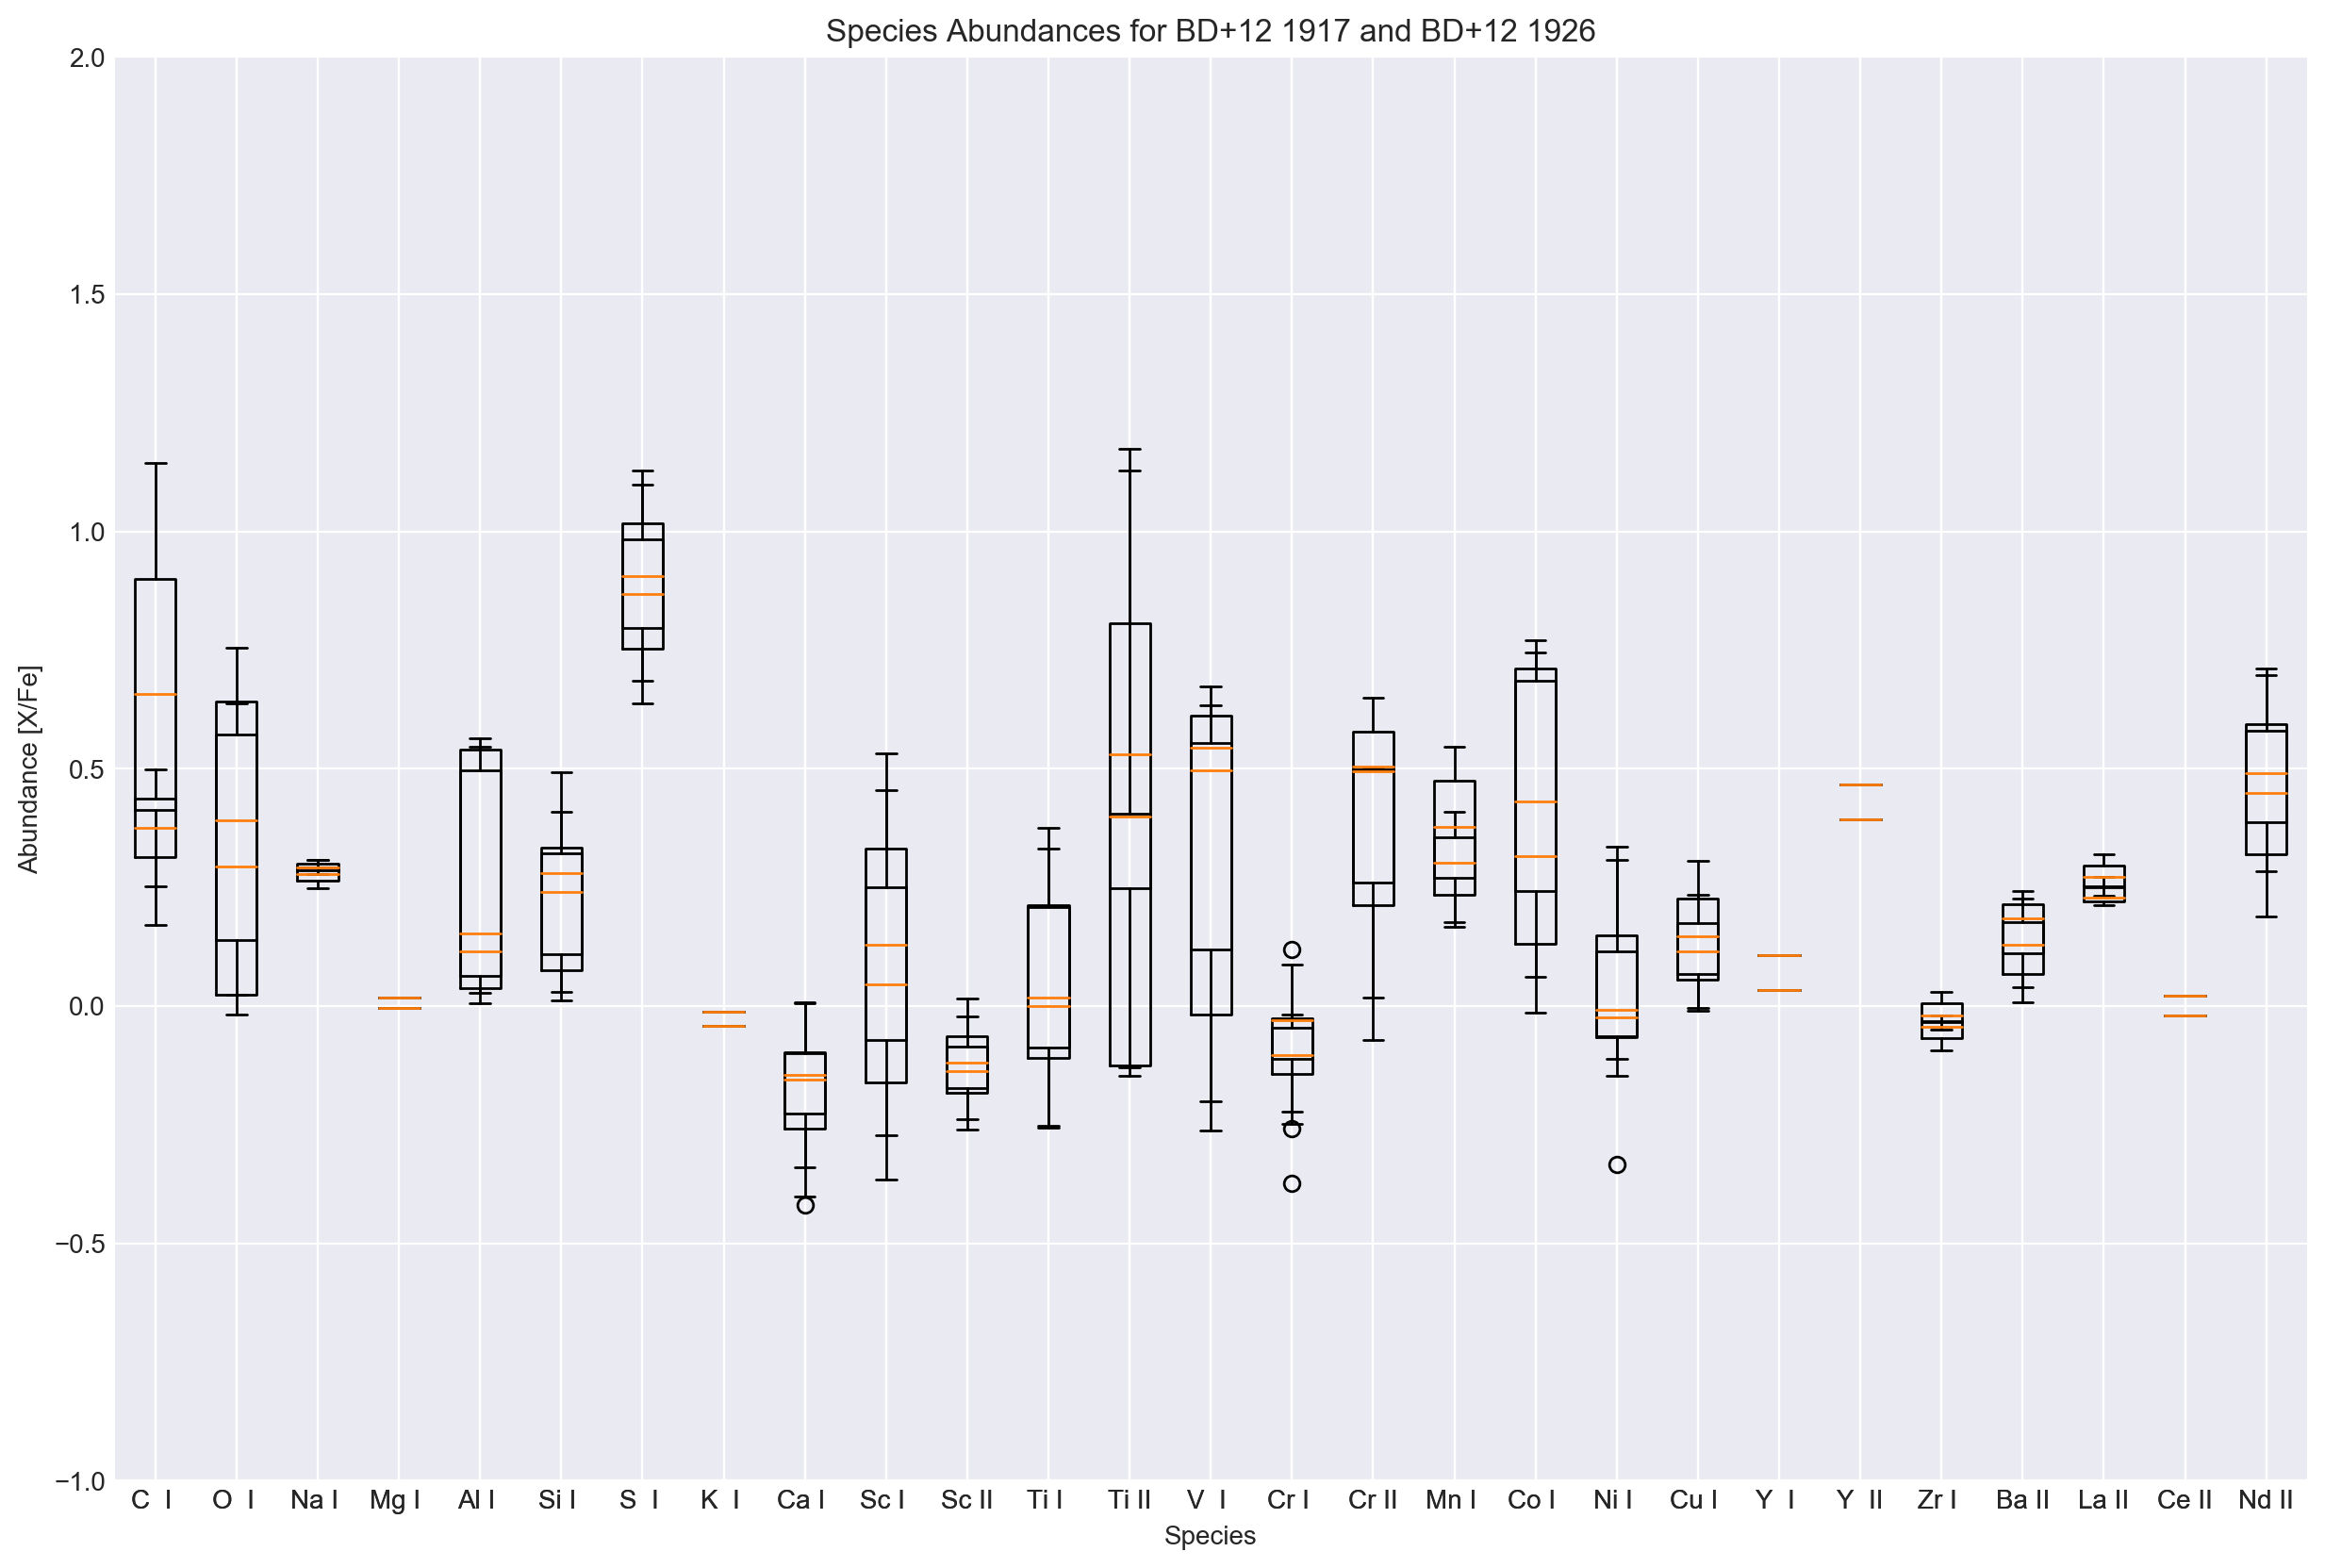

In [379]:
plt.figure(figsize=(15,10),dpi=200)
plt.title("Species Abundances for BD+12 1917 and BD+12 1926")
plt.ylabel("Abundance [X/Fe]")
plt.xlabel("Species")
plt.ylim(-1.0,2.0)

for f_key in file_dict.keys():
    species_dict = file_dict[f_key]
    input_fe_abund, fe_df = species_dict['Fe I ']
    fe_h = np.mean(fe_df['abund']) - float(input_fe_abund)
    species_list=[]
    x_fe_list =[]
    unc_list = []
    for key in species_dict.keys():
        if key not in ['Fe I ', 'Fe II']:

                
            species_list.append(key)
            input_abund, x_df = species_dict[key]
            if key == 'C  I ':
                x_df = x_df[x_df['wavelength'] != 7113.18]
            if key == 'O  I ':
                x_df = x_df[x_df['wavelength'] != 6156.76]
            x_fe_list.append(np.array(x_df['abund']) - float(input_abund) - fe_h)
            unc_list.append(np.std(x_df['abund']))
    plt.boxplot(x_fe_list, labels = species_list)
plt.legend() 
    

In [374]:
help(plt.boxplot)

Help on function boxplot in module matplotlib.pyplot:

boxplot(x, notch=None, sym=None, vert=None, whis=None, positions=None, widths=None, patch_artist=None, bootstrap=None, usermedians=None, conf_intervals=None, meanline=None, showmeans=None, showcaps=None, showbox=None, showfliers=None, boxprops=None, labels=None, flierprops=None, medianprops=None, meanprops=None, capprops=None, whiskerprops=None, manage_ticks=True, autorange=False, zorder=None, *, data=None)
    Make a box and whisker plot.
    
    Make a box and whisker plot for each column of ``x`` or each
    vector in sequence ``x``.  The box extends from the lower to
    upper quartile values of the data, with a line at the median.
    The whiskers extend from the box to show the range of the
    data.  Flier points are those past the end of the whiskers.
    
    Parameters
    ----------
    x : Array or a sequence of vectors.
        The input data.
    
    notch : bool, optional (False)
        If `True`, will produce a n